# Análisis Exploratorio de Datos (EDA) - Seguros de Cumplimiento

Este notebook realiza un análisis exploratorio completo de los datos de producción y siniestros de seguros de cumplimiento.

## Contenido:
1. Carga y exploración inicial
2. Análisis de tipos de datos
3. Análisis de valores únicos
4. Análisis de valores nulos y ceros
5. Limpieza de DEPARTAMENTO_SINIESTRO
6. Creación de columna POLIZA_AMPARO
7. Visualizaciones básicas

In [35]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Carga y Exploración Inicial

In [36]:
# Definir rutas de archivos
ruta_prod = '../data/in/ProdCumpli.csv'
ruta_sinies = '../data/in/SiniesCumpli.csv'

# Cargar datos
print("Cargando datos...")
df_prod = pd.read_csv(ruta_prod)
df_sinies = pd.read_csv(ruta_sinies)

print(f"\n✓ ProdCumpli cargado: {df_prod.shape[0]:,} registros x {df_prod.shape[1]} columnas")
print(f"✓ SiniesCumpli cargado: {df_sinies.shape[0]:,} registros x {df_sinies.shape[1]} columnas")

Cargando datos...

✓ ProdCumpli cargado: 1,242,477 registros x 10 columnas
✓ SiniesCumpli cargado: 202,984 registros x 15 columnas


In [37]:
# Vista preliminar de ProdCumpli
print("="*80)
print("DATASET: ProdCumpli.csv")
print("="*80)
display(df_prod.head(10))

DATASET: ProdCumpli.csv


,conta,anio,Mes,Poliza,CodSucursal,Ramo,VigenciaInicioPoliza,VigenciaFinPoliza,ValorPrimaEquiv,Amparo
0,1,2025,6,62512,9,CUMPLIMIENTO,09/07/2003,09/10/2030,11544.00,ESTABILIDAD DE LA OBRA
1,2,2025,6,614751,43,CUMPLIMIENTO,10/06/2000,18/07/2078,80000.00,SERIEDAD DE LA OFERTA
2,3,2025,6,1001850,12,CUMPLIMIENTO,05/12/2008,09/02/2029,22000.00,CUMPLIMIENTO
3,4,2025,6,1002709,12,CUMPLIMIENTO,10/07/2009,10/02/2029,22000.00,CUMPLIMIENTO
4,5,2025,6,100038036,10,CUMPLIMIENTO,29/09/2014,29/09/2025,204446.81,CALIDAD Y CORRECTO FUNCIONAMIENTO
5,6,2025,6,100049134,10,CUMPLIMIENTO,21/10/2015,21/10/2025,1118036481.16,CALIDAD DE LOS ELEMENTOS
6,7,2025,6,100049134,10,CUMPLIMIENTO,21/10/2015,21/10/2025,1118036481.16,ESTABILIDAD DE LA OBRA
7,8,2025,6,100049134,10,CUMPLIMIENTO,21/10/2015,21/10/2025,1118036481.16,CALIDAD DE LOS ELEMENTOS
8,9,2025,6,100049134,10,CUMPLIMIENTO,21/10/2015,21/10/2025,1118036481.16,ESTABILIDAD DE LA OBRA
9,10,2025,6,100049134,10,CUMPLIMIENTO,21/10/2025,06/11/2025,0.00,CALIDAD DE LOS ELEMENTOS


In [38]:
# Vista preliminar de SiniesCumpli
print("="*80)
print("DATASET: SiniesCumpli.csv")
print("="*80)
display(df_sinies.head(10))

DATASET: SiniesCumpli.csv


,Conta,anio,Mes,cod_suc,SINIESTRO,POLIZA,DEPARTAMENTO_SINIESTRO,VALOR_ASEGURADO,FECHA_DE_SINIESTRO,FECHA_AVISO,AMPARO,ULT_FECHA_PAGO,PAGOS,RESERVA_ACTUAL_EQUI,RAMO
0,1,2015,1,11,50243,645675,11-BOGOTA D.C.,1314750771.00,23/08/2005,26/08/2005,DISPOSICIONES LEGALES,NaN,0.00,1960000.00,CUMPLIMIENTO
1,2,2015,1,11,50132,645675,11-BOGOTA D.C.,1314750771.00,23/05/2005,01/06/2005,DISPOSICIONES LEGALES,NaN,0.00,6082000.00,CUMPLIMIENTO
2,3,2015,1,11,50134,645675,11-BOGOTA D.C.,1314750771.00,24/05/2005,01/06/2005,DISPOSICIONES LEGALES,NaN,0.00,3826000.00,CUMPLIMIENTO
3,4,2015,1,11,50151,645675,11-BOGOTA D.C.,1314750771.00,15/06/2005,21/06/2005,DISPOSICIONES LEGALES,NaN,0.00,716000.00,CUMPLIMIENTO
4,5,2015,1,10,1000173,613108,5-ANTIOQUIA,2415316264.80,21/05/2009,26/05/2009,ESTABILIDAD DE LA OBRA,NaN,0.00,2440000.00,CUMPLIMIENTO
5,6,2015,1,10,60251,632918,11-BOGOTA D.C.,2020200623.40,17/02/2006,24/02/2006,DISPOSICIONES LEGALES,NaN,0.00,5900000.00,CUMPLIMIENTO
6,7,2015,1,14,1000102,100007331,50-META,5247983066.20,01/07/2011,14/05/2013,PRESTACIONES SOCIALES,27/11/2014,0.00,1554712.50,CUMPLIMIENTO
7,8,2015,1,14,1000084,100009396,27-CHOCO,175446060.00,01/05/2012,23/07/2013,CUMPLIMIENTO,NaN,0.00,7895073.00,CUMPLIMIENTO
8,9,2015,1,14,1000131,100021177,5-ANTIOQUIA,4567980856.20,23/10/2013,12/09/2014,BUEN MANEJO DEL ANTICIPO,NaN,0.00,620000000.00,CUMPLIMIENTO
9,10,2015,1,14,1000072,100012789,85-CASANARE,23132457120.00,30/03/2012,04/06/2013,PRESTACIONES SOCIALES,29/10/2013,0.00,4227357.24,CUMPLIMIENTO


## 2. Análisis de Tipos de Datos

In [39]:
def analizar_tipos_datos(df, nombre_df):
    """
    Analiza los tipos de datos de un DataFrame y proporciona un resumen detallado
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE TIPOS DE DATOS: {nombre_df}")
    print(f"{'='*80}\n")
    
    # Crear DataFrame de resumen
    resumen = pd.DataFrame({
        'Columna': df.columns,
        'Tipo_Actual': df.dtypes.values,
        'Tipo_Sugerido': [''] * len(df.columns),
        'No_Nulos': df.count().values,
        'Nulos': df.isnull().sum().values,
        '%_Nulos': (df.isnull().sum() / len(df) * 100).values,
        'Ejemplo': [df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None for col in df.columns]
    })
    
    # Sugerir tipos de datos apropiados
    for idx, col in enumerate(df.columns):
        tipo_actual = df[col].dtype
        
        # Detectar fechas
        if any(keyword in col.lower() for keyword in ['fecha', 'vigencia']):
            resumen.at[idx, 'Tipo_Sugerido'] = 'datetime'
        # Detectar numéricos
        elif tipo_actual in ['int64', 'float64']:
            resumen.at[idx, 'Tipo_Sugerido'] = 'numeric'
        # Detectar categóricos
        elif tipo_actual == 'object':
            n_unique = df[col].nunique()
            if n_unique < 50:
                resumen.at[idx, 'Tipo_Sugerido'] = 'categorical'
            else:
                resumen.at[idx, 'Tipo_Sugerido'] = 'text'
        else:
            resumen.at[idx, 'Tipo_Sugerido'] = str(tipo_actual)
    
    display(resumen)
    
    # Resumen por tipo
    print("\n" + "-"*80)
    print("RESUMEN POR TIPO DE DATO:")
    print("-"*80)
    print(resumen['Tipo_Sugerido'].value_counts())
    
    return resumen

# Analizar ambos datasets
resumen_prod = analizar_tipos_datos(df_prod, "ProdCumpli")
resumen_sinies = analizar_tipos_datos(df_sinies, "SiniesCumpli")


ANÁLISIS DE TIPOS DE DATOS: ProdCumpli



,Columna,Tipo_Actual,Tipo_Sugerido,No_Nulos,Nulos,%_Nulos,Ejemplo
0,conta,int64,numeric,1242477,0,0.00,1
1,anio,int64,numeric,1242477,0,0.00,2025
2,Mes,int64,numeric,1242477,0,0.00,6
3,Poliza,int64,numeric,1242477,0,0.00,62512
4,CodSucursal,int64,numeric,1242477,0,0.00,9
5,Ramo,object,categorical,1242477,0,0.00,CUMPLIMIENTO
6,VigenciaInicioPoliza,object,datetime,1242477,0,0.00,09/07/2003
7,VigenciaFinPoliza,object,datetime,1242477,0,0.00,09/10/2030
8,ValorPrimaEquiv,float64,numeric,1242477,0,0.00,11544.00
9,Amparo,object,categorical,1242477,0,0.00,ESTABILIDAD DE LA OBRA



--------------------------------------------------------------------------------
RESUMEN POR TIPO DE DATO:
--------------------------------------------------------------------------------
Tipo_Sugerido
numeric        6
categorical    2
datetime       2
Name: count, dtype: int64

ANÁLISIS DE TIPOS DE DATOS: SiniesCumpli



,Columna,Tipo_Actual,Tipo_Sugerido,No_Nulos,Nulos,%_Nulos,Ejemplo
0,Conta,int64,numeric,202984,0,0.00,1
1,anio,int64,numeric,202984,0,0.00,2015
2,Mes,int64,numeric,202984,0,0.00,1
3,cod_suc,int64,numeric,202984,0,0.00,11
4,SINIESTRO,int64,numeric,202984,0,0.00,50243
5,POLIZA,int64,numeric,202984,0,0.00,645675
6,DEPARTAMENTO_SINIESTRO,object,categorical,202984,0,0.00,11-BOGOTA D.C.
7,VALOR_ASEGURADO,float64,numeric,198617,4367,2.15,1314750771.00
8,FECHA_DE_SINIESTRO,object,datetime,202984,0,0.00,23/08/2005
9,FECHA_AVISO,object,datetime,202984,0,0.00,26/08/2005



--------------------------------------------------------------------------------
RESUMEN POR TIPO DE DATO:
--------------------------------------------------------------------------------
Tipo_Sugerido
numeric        9
categorical    3
datetime       3
Name: count, dtype: int64


## 3. Análisis de Valores Únicos

In [40]:
def analizar_valores_unicos(df, nombre_df):
    """
    Analiza la cantidad de valores únicos por columna
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE VALORES ÚNICOS: {nombre_df}")
    print(f"{'='*80}\n")
    
    resumen_unicos = pd.DataFrame({
        'Columna': df.columns,
        'Total_Registros': len(df),
        'Valores_Unicos': [df[col].nunique() for col in df.columns],
        'Cardinalidad_%': [df[col].nunique() / len(df) * 100 for col in df.columns],
        'Tipo_Cardinalidad': [''] * len(df.columns)
    })
    
    # Clasificar cardinalidad
    for idx, row in resumen_unicos.iterrows():
        card_pct = row['Cardinalidad_%']
        if card_pct > 95:
            resumen_unicos.at[idx, 'Tipo_Cardinalidad'] = 'Muy Alta (>95%) - Identificador'
        elif card_pct > 50:
            resumen_unicos.at[idx, 'Tipo_Cardinalidad'] = 'Alta (50-95%)'
        elif card_pct > 10:
            resumen_unicos.at[idx, 'Tipo_Cardinalidad'] = 'Media (10-50%)'
        else:
            resumen_unicos.at[idx, 'Tipo_Cardinalidad'] = 'Baja (<10%) - Categórica'
    
    # Ordenar por cardinalidad
    resumen_unicos = resumen_unicos.sort_values('Valores_Unicos', ascending=False)
    display(resumen_unicos)
    
    return resumen_unicos

# Analizar valores únicos
unicos_prod = analizar_valores_unicos(df_prod, "ProdCumpli")
unicos_sinies = analizar_valores_unicos(df_sinies, "SiniesCumpli")


ANÁLISIS DE VALORES ÚNICOS: ProdCumpli



,Columna,Total_Registros,Valores_Unicos,Cardinalidad_%,Tipo_Cardinalidad
0,conta,1242477,1242477,100.00,Muy Alta (>95%) - Identificador
8,ValorPrimaEquiv,1242477,365477,29.42,Media (10-50%)
3,Poliza,1242477,257875,20.75,Media (10-50%)
6,VigenciaInicioPoliza,1242477,4436,0.36,Baja (<10%) - Categórica
7,VigenciaFinPoliza,1242477,2614,0.21,Baja (<10%) - Categórica
4,CodSucursal,1242477,58,0.00,Baja (<10%) - Categórica
9,Amparo,1242477,15,0.00,Baja (<10%) - Categórica
1,anio,1242477,1,0.00,Baja (<10%) - Categórica
5,Ramo,1242477,1,0.00,Baja (<10%) - Categórica
2,Mes,1242477,1,0.00,Baja (<10%) - Categórica



ANÁLISIS DE VALORES ÚNICOS: SiniesCumpli



,Columna,Total_Registros,Valores_Unicos,Cardinalidad_%,Tipo_Cardinalidad
0,Conta,202984,202984,100.00,Muy Alta (>95%) - Identificador
13,RESERVA_ACTUAL_EQUI,202984,9005,4.44,Baja (<10%) - Categórica
7,VALOR_ASEGURADO,202984,5496,2.71,Baja (<10%) - Categórica
5,POLIZA,202984,5104,2.51,Baja (<10%) - Categórica
12,PAGOS,202984,4697,2.31,Baja (<10%) - Categórica
4,SINIESTRO,202984,3286,1.62,Baja (<10%) - Categórica
8,FECHA_DE_SINIESTRO,202984,3076,1.52,Baja (<10%) - Categórica
9,FECHA_AVISO,202984,2493,1.23,Baja (<10%) - Categórica
11,ULT_FECHA_PAGO,202984,1086,0.54,Baja (<10%) - Categórica
3,cod_suc,202984,39,0.02,Baja (<10%) - Categórica


In [41]:
# Mostrar valores únicos de columnas categóricas importantes
print("\n" + "="*80)
print("VALORES ÚNICOS DE COLUMNA 'AMPARO' (ProdCumpli)")
print("="*80)
print(f"\nTotal de tipos de amparo: {df_prod['Amparo'].nunique()}\n")
print(df_prod['Amparo'].value_counts())


VALORES ÚNICOS DE COLUMNA 'AMPARO' (ProdCumpli)

Total de tipos de amparo: 15

Amparo
PRESTACIONES SOCIALES                521197
CUMPLIMIENTO                         212440
CALIDAD DEL SERVICIO                 178505
ESTABILIDAD DE LA OBRA               170329
CALIDAD DE LOS ELEMENTOS              45177
CALIDAD Y CORRECTO FUNCIONAMIENTO     32827
BUEN MANEJO DEL ANTICIPO              31362
SERIEDAD DE LA OFERTA                 19906
CALIDAD                               18881
PAGO ANTICIPADO                        5256
CORRECTO FUNCIONAMIENTO                3290
PROVISION DE REPUESTOS                 1589
DISPOSICIONES LEGALES                  1079
SUMINISTRO DE REPUESTOS                 422
BUEN MANEJO DE MATERIALES               217
Name: count, dtype: int64


In [42]:
print("\n" + "="*80)
print("VALORES ÚNICOS DE COLUMNA 'AMPARO' (SiniesCumpli)")
print("="*80)
print(f"\nTotal de tipos de amparo: {df_sinies['AMPARO'].nunique()}\n")
print(df_sinies['AMPARO'].value_counts())


VALORES ÚNICOS DE COLUMNA 'AMPARO' (SiniesCumpli)

Total de tipos de amparo: 14

AMPARO
CUMPLIMIENTO                      93145
PRESTACIONES SOCIALES             51864
DISPOSICIONES LEGALES             32511
BUEN MANEJO DEL ANTICIPO          13701
ESTABILIDAD DE LA OBRA             7037
SERIEDAD DE LA OFERTA              1334
CALIDAD DEL SERVICIO                990
CALIDAD                             756
CALIDAD DE LOS ELEMENTOS            630
CALIDAD Y CORRECTO FUNCIONAMIE      462
PAGO ANTICIPADO                     429
CALIDAD Y BUEN FUNC.                 69
CORRECTO FUNCIONAMIENTO              55
PROVISION DE REPUESTOS                1
Name: count, dtype: int64


## 4. Análisis de Valores Nulos y Ceros

In [43]:
def analizar_nulos_y_ceros(df, nombre_df):
    """
    Analiza valores nulos y ceros en columnas numéricas
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE VALORES NULOS Y CEROS: {nombre_df}")
    print(f"{'='*80}\n")
    
    # Análisis de nulos
    nulos = pd.DataFrame({
        'Columna': df.columns,
        'Tipo': df.dtypes.values,
        'Total_Nulos': df.isnull().sum().values,
        '%_Nulos': (df.isnull().sum() / len(df) * 100).values
    })
    
    # Agregar análisis de ceros para columnas numéricas
    ceros_count = []
    ceros_pct = []
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            count_ceros = (df[col] == 0).sum()
            pct_ceros = (count_ceros / len(df) * 100)
            ceros_count.append(count_ceros)
            ceros_pct.append(pct_ceros)
        else:
            ceros_count.append('-')
            ceros_pct.append('-')
    
    nulos['Total_Ceros'] = ceros_count
    nulos['%_Ceros'] = ceros_pct
    
    # Filtrar y mostrar solo columnas con nulos o ceros
    nulos_relevantes = nulos[
        (nulos['Total_Nulos'] > 0) | 
        (nulos['Total_Ceros'].apply(lambda x: x != '-' and x > 0))
    ]
    
    if len(nulos_relevantes) > 0:
        print("Columnas con valores nulos o ceros:\n")
        display(nulos_relevantes)
    else:
        print("✓ No se encontraron valores nulos ni ceros en este dataset")
    
    # Resumen general
    print("\n" + "-"*80)
    print("RESUMEN GENERAL:")
    print("-"*80)
    print(f"Total de columnas: {len(df.columns)}")
    print(f"Columnas con nulos: {(nulos['Total_Nulos'] > 0).sum()}")
    print(f"Columnas numéricas: {df.select_dtypes(include=[np.number]).shape[1]}")
    print(f"Columnas numéricas con ceros: {sum(1 for x in ceros_count if x != '-' and x > 0)}")
    
    return nulos

# Analizar nulos y ceros
nulos_prod = analizar_nulos_y_ceros(df_prod, "ProdCumpli")
nulos_sinies = analizar_nulos_y_ceros(df_sinies, "SiniesCumpli")


ANÁLISIS DE VALORES NULOS Y CEROS: ProdCumpli

Columnas con valores nulos o ceros:



,Columna,Tipo,Total_Nulos,%_Nulos,Total_Ceros,%_Ceros
8,ValorPrimaEquiv,float64,0,0.00,83342,6.71



--------------------------------------------------------------------------------
RESUMEN GENERAL:
--------------------------------------------------------------------------------
Total de columnas: 10
Columnas con nulos: 0
Columnas numéricas: 6
Columnas numéricas con ceros: 1

ANÁLISIS DE VALORES NULOS Y CEROS: SiniesCumpli

Columnas con valores nulos o ceros:



,Columna,Tipo,Total_Nulos,%_Nulos,Total_Ceros,%_Ceros
7,VALOR_ASEGURADO,float64,4367,2.15,0,0.00
11,ULT_FECHA_PAGO,object,109958,54.17,-,-
12,PAGOS,float64,0,0.00,192968,95.07
13,RESERVA_ACTUAL_EQUI,float64,0,0.00,4884,2.41



--------------------------------------------------------------------------------
RESUMEN GENERAL:
--------------------------------------------------------------------------------
Total de columnas: 15
Columnas con nulos: 2
Columnas numéricas: 9
Columnas numéricas con ceros: 2


## 5. Limpieza de DEPARTAMENTO_SINIESTRO

In [44]:
print("="*80)
print("LIMPIEZA DE COLUMNA DEPARTAMENTO_SINIESTRO")
print("="*80)

# Mostrar valores únicos actuales
print(f"\nValores únicos antes de la limpieza: {df_sinies['DEPARTAMENTO_SINIESTRO'].nunique()}\n")
print("Muestra de valores actuales:")
print(df_sinies['DEPARTAMENTO_SINIESTRO'].value_counts().head(10))

LIMPIEZA DE COLUMNA DEPARTAMENTO_SINIESTRO

Valores únicos antes de la limpieza: 34

Muestra de valores actuales:
DEPARTAMENTO_SINIESTRO
11-BOGOTA D.C.    77828
5-ANTIOQUIA       30584
13-BOLIVAR        14841
8-ATLANTICO       13095
76-VALLE          11270
85-CASANARE        7504
50-META            4971
68-SANTANDER       4070
41-HUILA           3627
73-TOLIMA          3211
Name: count, dtype: int64


In [45]:
# Extraer código de departamento (parte antes del guión)
df_sinies['COD_DEPTO'] = df_sinies['DEPARTAMENTO_SINIESTRO'].str.split('-').str[0]

# Convertir a entero
df_sinies['COD_DEPTO'] = pd.to_numeric(df_sinies['COD_DEPTO'], errors='coerce').astype('Int64')

print("\n✓ Columna COD_DEPTO creada exitosamente")
print(f"\nValores únicos en COD_DEPTO: {df_sinies['COD_DEPTO'].nunique()}")
print("\nDistribución de códigos:")
print(df_sinies['COD_DEPTO'].value_counts().sort_index())


✓ Columna COD_DEPTO creada exitosamente

Valores únicos en COD_DEPTO: 34

Distribución de códigos:
COD_DEPTO
0      1638
5     30584
8     13095
11    77828
13    14841
15     2394
17     1942
18      969
19     1044
20     2997
23     1401
25     2995
27      740
41     3627
44      600
47     2234
50     4971
52     1729
54      765
63     1708
66     1891
68     4070
70     1971
73     3211
76    11270
81     2314
85     7504
86      341
88      331
91      259
94      236
95      474
97      510
99      500
Name: count, dtype: Int64


In [46]:
# Crear tabla de referencia de departamentos
print("\n" + "="*80)
print("TABLA DE REFERENCIA DE DEPARTAMENTOS")
print("="*80)

# Extraer código y nombre
df_departamentos = df_sinies[['DEPARTAMENTO_SINIESTRO']].drop_duplicates().copy()
df_departamentos['COD_DEPTO'] = df_departamentos['DEPARTAMENTO_SINIESTRO'].str.split('-').str[0]
df_departamentos['NOMBRE_DEPTO'] = df_departamentos['DEPARTAMENTO_SINIESTRO'].str.split('-').str[1]

# Convertir código a entero
df_departamentos['COD_DEPTO'] = pd.to_numeric(df_departamentos['COD_DEPTO'], errors='coerce').astype('Int64')

# Limpiar espacios en blanco del nombre
df_departamentos['NOMBRE_DEPTO'] = df_departamentos['NOMBRE_DEPTO'].str.strip()

# Ordenar por código
df_departamentos = df_departamentos.sort_values('COD_DEPTO').reset_index(drop=True)

# Seleccionar solo las columnas necesarias
df_departamentos = df_departamentos[['COD_DEPTO', 'NOMBRE_DEPTO', 'DEPARTAMENTO_SINIESTRO']]

print(f"\n✓ Tabla de referencia creada con {len(df_departamentos)} departamentos\n")
display(df_departamentos)


TABLA DE REFERENCIA DE DEPARTAMENTOS

✓ Tabla de referencia creada con 34 departamentos



,COD_DEPTO,NOMBRE_DEPTO,DEPARTAMENTO_SINIESTRO
0,0,NO ESPECIFCADO,0-NO ESPECIFCADO
1,5,ANTIOQUIA,5-ANTIOQUIA
2,8,ATLANTICO,8-ATLANTICO
3,11,BOGOTA D.C.,11-BOGOTA D.C.
4,13,BOLIVAR,13-BOLIVAR
5,15,BOYACA,15-BOYACA
6,17,CALDAS,17-CALDAS
7,18,CAQUETA,18-CAQUETA
8,19,CAUCA,19-CAUCA
9,20,CESAR,20-CESAR


In [47]:
# Guardar tabla de referencia en data/in/
df_departamentos.to_csv('../data/in/tabla_referencia_departamentos.csv', index=False)
print("\n✓ Tabla de referencia guardada en: data/in/tabla_referencia_departamentos.csv")


✓ Tabla de referencia guardada en: data/in/tabla_referencia_departamentos.csv


## 6. Creación de Columna POLIZA_AMPARO

In [48]:
print("="*80)
print("CREACIÓN DE COLUMNA POLIZA_AMPARO")
print("="*80)

# Para ProdCumpli
df_prod['POLIZA_AMPARO'] = df_prod['Poliza'].astype(str) + '_' + df_prod['Amparo']
print(f"\n✓ Columna POLIZA_AMPARO creada en ProdCumpli")
print(f"  - Total de combinaciones únicas: {df_prod['POLIZA_AMPARO'].nunique():,}")
print(f"\nEjemplos:")
print(df_prod[['Poliza', 'Amparo', 'POLIZA_AMPARO']].head(10))

CREACIÓN DE COLUMNA POLIZA_AMPARO



✓ Columna POLIZA_AMPARO creada en ProdCumpli
  - Total de combinaciones únicas: 607,407

Ejemplos:
      Poliza                             Amparo  \
0      62512             ESTABILIDAD DE LA OBRA   
1     614751              SERIEDAD DE LA OFERTA   
2    1001850                       CUMPLIMIENTO   
3    1002709                       CUMPLIMIENTO   
4  100038036  CALIDAD Y CORRECTO FUNCIONAMIENTO   
5  100049134           CALIDAD DE LOS ELEMENTOS   
6  100049134             ESTABILIDAD DE LA OBRA   
7  100049134           CALIDAD DE LOS ELEMENTOS   
8  100049134             ESTABILIDAD DE LA OBRA   
9  100049134           CALIDAD DE LOS ELEMENTOS   

                                 POLIZA_AMPARO  
0                 62512_ESTABILIDAD DE LA OBRA  
1                 614751_SERIEDAD DE LA OFERTA  
2                         1001850_CUMPLIMIENTO  
3                         1002709_CUMPLIMIENTO  
4  100038036_CALIDAD Y CORRECTO FUNCIONAMIENTO  
5           100049134_CALIDAD DE LOS ELEMENT

In [49]:
# Para SiniesCumpli
df_sinies['POLIZA_AMPARO'] = df_sinies['POLIZA'].astype(str) + '_' + df_sinies['AMPARO']
print(f"\n✓ Columna POLIZA_AMPARO creada en SiniesCumpli")
print(f"  - Total de combinaciones únicas: {df_sinies['POLIZA_AMPARO'].nunique():,}")
print(f"\nEjemplos:")
print(df_sinies[['POLIZA', 'AMPARO', 'POLIZA_AMPARO']].head(10))


✓ Columna POLIZA_AMPARO creada en SiniesCumpli
  - Total de combinaciones únicas: 5,746

Ejemplos:
      POLIZA                    AMPARO                       POLIZA_AMPARO
0     645675     DISPOSICIONES LEGALES        645675_DISPOSICIONES LEGALES
1     645675     DISPOSICIONES LEGALES        645675_DISPOSICIONES LEGALES
2     645675     DISPOSICIONES LEGALES        645675_DISPOSICIONES LEGALES
3     645675     DISPOSICIONES LEGALES        645675_DISPOSICIONES LEGALES
4     613108    ESTABILIDAD DE LA OBRA       613108_ESTABILIDAD DE LA OBRA
5     632918     DISPOSICIONES LEGALES        632918_DISPOSICIONES LEGALES
6  100007331     PRESTACIONES SOCIALES     100007331_PRESTACIONES SOCIALES
7  100009396              CUMPLIMIENTO              100009396_CUMPLIMIENTO
8  100021177  BUEN MANEJO DEL ANTICIPO  100021177_BUEN MANEJO DEL ANTICIPO
9  100012789     PRESTACIONES SOCIALES     100012789_PRESTACIONES SOCIALES


## 6.1. Duración de Pólizas en Meses

Calculamos la duración de cada póliza en meses para analizar la distribución de los plazos de vigencia.

In [50]:
print("="*80)
print("ANÁLISIS DE DURACIÓN DE PÓLIZAS")
print("="*80)

# Convertir fechas a datetime
df_prod['VigenciaInicioPoliza_dt'] = pd.to_datetime(df_prod['VigenciaInicioPoliza'], format='%d/%m/%Y', errors='coerce')
df_prod['VigenciaFinPoliza_dt'] = pd.to_datetime(df_prod['VigenciaFinPoliza'], format='%d/%m/%Y', errors='coerce')

# Calcular la duración en meses
df_prod['Duracion_Meses'] = ((df_prod['VigenciaFinPoliza_dt'] - df_prod['VigenciaInicioPoliza_dt']).dt.days / 30.44).round(2)

print(f"\n✓ Columna Duracion_Meses creada exitosamente")
print(f"\nEstadísticas de duración de pólizas (en meses):")
print("-" * 80)
print(df_prod['Duracion_Meses'].describe())

print(f"\nDuración mínima: {df_prod['Duracion_Meses'].min():.2f} meses ({df_prod['Duracion_Meses'].min()/12:.2f} años)")
print(f"Duración máxima: {df_prod['Duracion_Meses'].max():.2f} meses ({df_prod['Duracion_Meses'].max()/12:.2f} años)")
print(f"Duración promedio: {df_prod['Duracion_Meses'].mean():.2f} meses ({df_prod['Duracion_Meses'].mean()/12:.2f} años)")
print(f"Duración mediana: {df_prod['Duracion_Meses'].median():.2f} meses ({df_prod['Duracion_Meses'].median()/12:.2f} años)")

# Mostrar algunos ejemplos
print("\n\nEjemplos de pólizas con sus duraciones:")
print("-" * 80)
display(df_prod[['Poliza', 'VigenciaInicioPoliza', 'VigenciaFinPoliza', 'Duracion_Meses']].head(10))

ANÁLISIS DE DURACIÓN DE PÓLIZAS

✓ Columna Duracion_Meses creada exitosamente

Estadísticas de duración de pólizas (en meses):
--------------------------------------------------------------------------------
count   1242477.00
mean         29.35
std          21.72
min           0.00
25%           5.42
50%          36.96
75%          42.51
max         937.16
Name: Duracion_Meses, dtype: float64

Duración mínima: 0.00 meses (0.00 años)
Duración máxima: 937.16 meses (78.10 años)
Duración promedio: 29.35 meses (2.45 años)
Duración mediana: 36.96 meses (3.08 años)


Ejemplos de pólizas con sus duraciones:
--------------------------------------------------------------------------------


,Poliza,VigenciaInicioPoliza,VigenciaFinPoliza,Duracion_Meses
0,62512,09/07/2003,09/10/2030,327.00
1,614751,10/06/2000,18/07/2078,937.16
2,1001850,05/12/2008,09/02/2029,242.15
3,1002709,10/07/2009,10/02/2029,235.05
4,100038036,29/09/2014,29/09/2025,132.00
5,100049134,21/10/2015,21/10/2025,120.01
6,100049134,21/10/2015,21/10/2025,120.01
7,100049134,21/10/2015,21/10/2025,120.01
8,100049134,21/10/2015,21/10/2025,120.01
9,100049134,21/10/2025,06/11/2025,0.53


In [ ]:
# Histograma de distribución de duración de pólizas en meses
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma 1: Todas las duraciones
axes[0].hist(df_prod['Duracion_Meses'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Duración de Pólizas\n(Todas las pólizas)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Duración (meses)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(alpha=0.3)

# Agregar líneas de referencia
media = df_prod['Duracion_Meses'].mean()
mediana = df_prod['Duracion_Meses'].median()
axes[0].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f} meses')
axes[0].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f} meses')
axes[0].legend()

# Histograma 2: Duraciones filtradas (≤ 600 meses para mejor visualización)
duracion_filtrada = df_prod[df_prod['Duracion_Meses'] <= 600]['Duracion_Meses']
axes[1].hist(duracion_filtrada, bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Duración de Pólizas\n(Pólizas con duración ≤ 600 meses)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Duración (meses)', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].grid(alpha=0.3)

# Agregar líneas de referencia
media_filt = duracion_filtrada.mean()
mediana_filt = duracion_filtrada.median()
axes[1].axvline(media_filt, color='red', linestyle='--', linewidth=2, label=f'Media: {media_filt:.1f} meses')
axes[1].axvline(mediana_filt, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana_filt:.1f} meses')
axes[1].legend()

plt.tight_layout()
plt.show()

# Distribución por rangos
print("\n" + "="*80)
print("DISTRIBUCIÓN POR RANGOS DE DURACIÓN")
print("="*80)

rangos = pd.cut(df_prod['Duracion_Meses'], 
                bins=[0, 12, 24, 36, 60, 120, 240, float('inf')],
                labels=['0-12 meses', '12-24 meses', '24-36 meses', '36-60 meses', 
                       '60-120 meses', '120-240 meses', '>240 meses'])

distribucion_rangos = rangos.value_counts().sort_index()
print("\nCantidad de pólizas por rango de duración:")
for rango, cantidad in distribucion_rangos.items():
    porcentaje = (cantidad / len(df_prod)) * 100
    print(f"  {rango:20s}: {cantidad:8,} pólizas ({porcentaje:5.2f}%)")

## 7. Visualizaciones Básicas

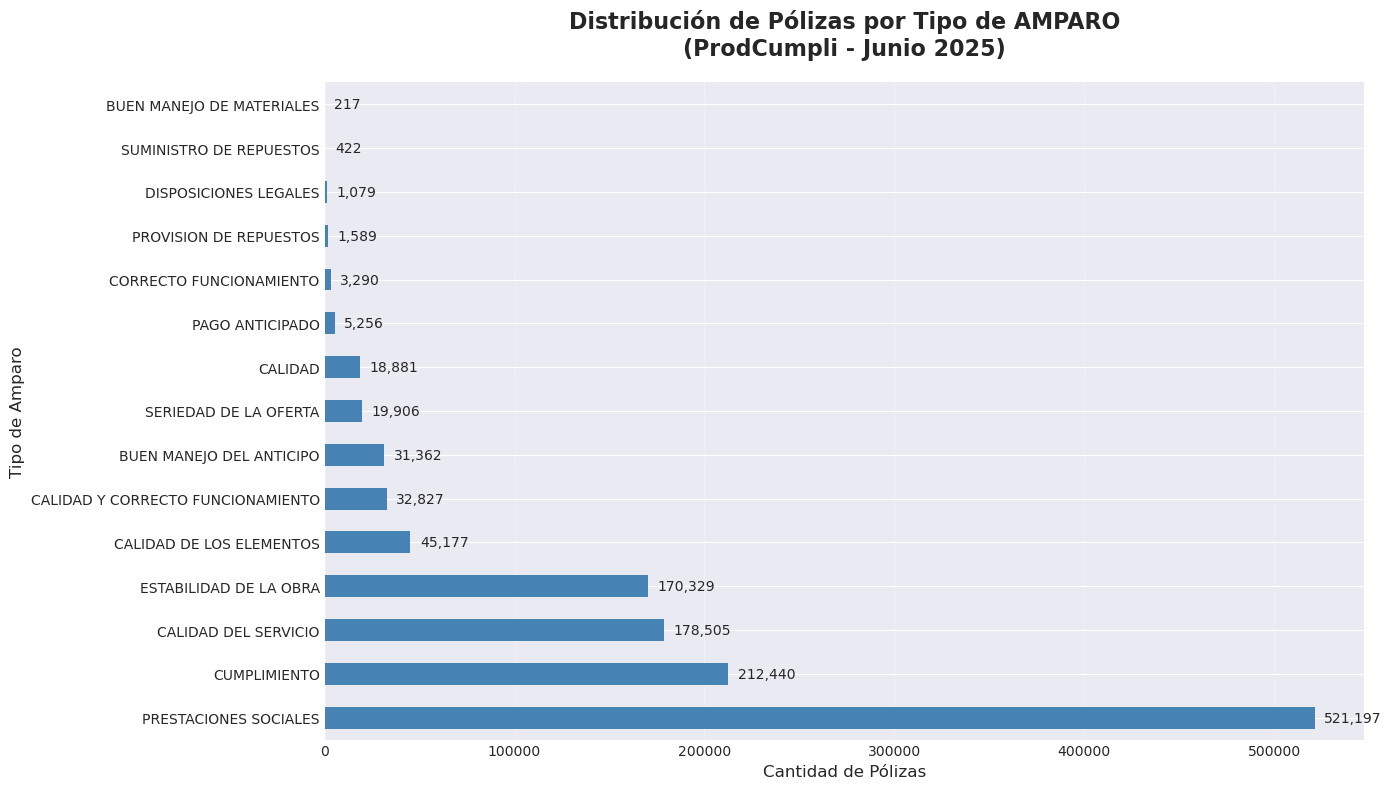

In [51]:
# Distribución de AMPARO en ProdCumpli
fig, ax = plt.subplots(figsize=(14, 8))
amparo_counts = df_prod['Amparo'].value_counts()
amparo_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Distribución de Pólizas por Tipo de AMPARO\n(ProdCumpli - Junio 2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cantidad de Pólizas', fontsize=12)
ax.set_ylabel('Tipo de Amparo', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(amparo_counts):
    ax.text(v + 5000, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [52]:
print("="*80)
print("RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO")
print("="*80)

print("\n📊 DATASETS ANALIZADOS:")
print("-" * 80)
print(f"1. ProdCumpli.csv")
print(f"   - Registros: {len(df_prod):,}")
print(f"   - Columnas: {len(df_prod.columns)} (+ 4 nuevas: POLIZA_AMPARO, VigenciaInicioPoliza_dt, VigenciaFinPoliza_dt, Duracion_Meses)")
print(f"   - Pólizas únicas: {df_prod['Poliza'].nunique():,}")
print(f"   - Tipos de amparo: {df_prod['Amparo'].nunique()}")
print(f"   - Duración promedio de pólizas: {df_prod['Duracion_Meses'].mean():.1f} meses ({df_prod['Duracion_Meses'].mean()/12:.1f} años)")

print(f"\n2. SiniesCumpli.csv")
print(f"   - Registros: {len(df_sinies):,}")
print(f"   - Columnas: {len(df_sinies.columns)} (+ 2 nuevas: COD_DEPTO, POLIZA_AMPARO)")
print(f"   - Siniestros únicos: {df_sinies['SINIESTRO'].nunique():,}")
print(f"   - Pólizas únicas: {df_sinies['POLIZA'].nunique():,}")
print(f"   - Tipos de amparo: {df_sinies['AMPARO'].nunique()}")
print(f"   - Departamentos: {df_sinies['COD_DEPTO'].nunique()}")

print(f"\n3. Tabla de Referencia de Departamentos")
print(f"   - Registros: {len(df_departamentos)}")
print(f"   - Archivo: data/in/tabla_referencia_departamentos.csv")

print("\n✅ TAREAS COMPLETADAS:")
print("-" * 80)
print("✓ Análisis de tipos de datos por columna")
print("✓ Análisis de valores únicos por columna")
print("✓ Análisis de valores nulos y ceros en columnas numéricas")
print("✓ Limpieza de columna DEPARTAMENTO_SINIESTRO")
print("✓ Creación de tabla de referencia de departamentos")
print("✓ Creación de columna POLIZA_AMPARO en ambos datasets")
print("✓ Cálculo de duración de pólizas en meses (Duracion_Meses)")
print("✓ Visualizaciones básicas de distribuciones")

print("\n🔍 HALLAZGOS CLAVE:")
print("-" * 80)
print(f"• Amparo más común en producción: {df_prod['Amparo'].value_counts().index[0]}")
print(f"• Amparo con más siniestros: {df_sinies['AMPARO'].value_counts().index[0]}")
print(f"• Departamento con más siniestros: {df_sinies['COD_DEPTO'].value_counts().index[0]}")
print(f"• Total de pagos realizados: ${df_sinies['PAGOS'].sum():,.2f}")
print(f"• Siniestros con pago > 0: {(df_sinies['PAGOS'] > 0).sum():,} ({(df_sinies['PAGOS'] > 0).sum() / len(df_sinies) * 100:.1f}%)")

print("\n" + "="*80)

RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO

📊 DATASETS ANALIZADOS:
--------------------------------------------------------------------------------
1. ProdCumpli.csv
   - Registros: 1,242,477
   - Columnas: 14 (+ 4 nuevas: POLIZA_AMPARO, VigenciaInicioPoliza_dt, VigenciaFinPoliza_dt, Duracion_Meses)
   - Pólizas únicas: 257,875
   - Tipos de amparo: 15
   - Duración promedio de pólizas: 29.4 meses (2.4 años)

2. SiniesCumpli.csv
   - Registros: 202,984
   - Columnas: 17 (+ 2 nuevas: COD_DEPTO, POLIZA_AMPARO)
   - Siniestros únicos: 3,286
   - Pólizas únicas: 5,104
   - Tipos de amparo: 14
   - Departamentos: 34

3. Tabla de Referencia de Departamentos
   - Registros: 34
   - Archivo: data/in/tabla_referencia_departamentos.csv

✅ TAREAS COMPLETADAS:
--------------------------------------------------------------------------------
✓ Análisis de tipos de datos por columna
✓ Análisis de valores únicos por columna
✓ Análisis de valores nulos y ceros en columnas numéricas
✓ Limpieza de columna D

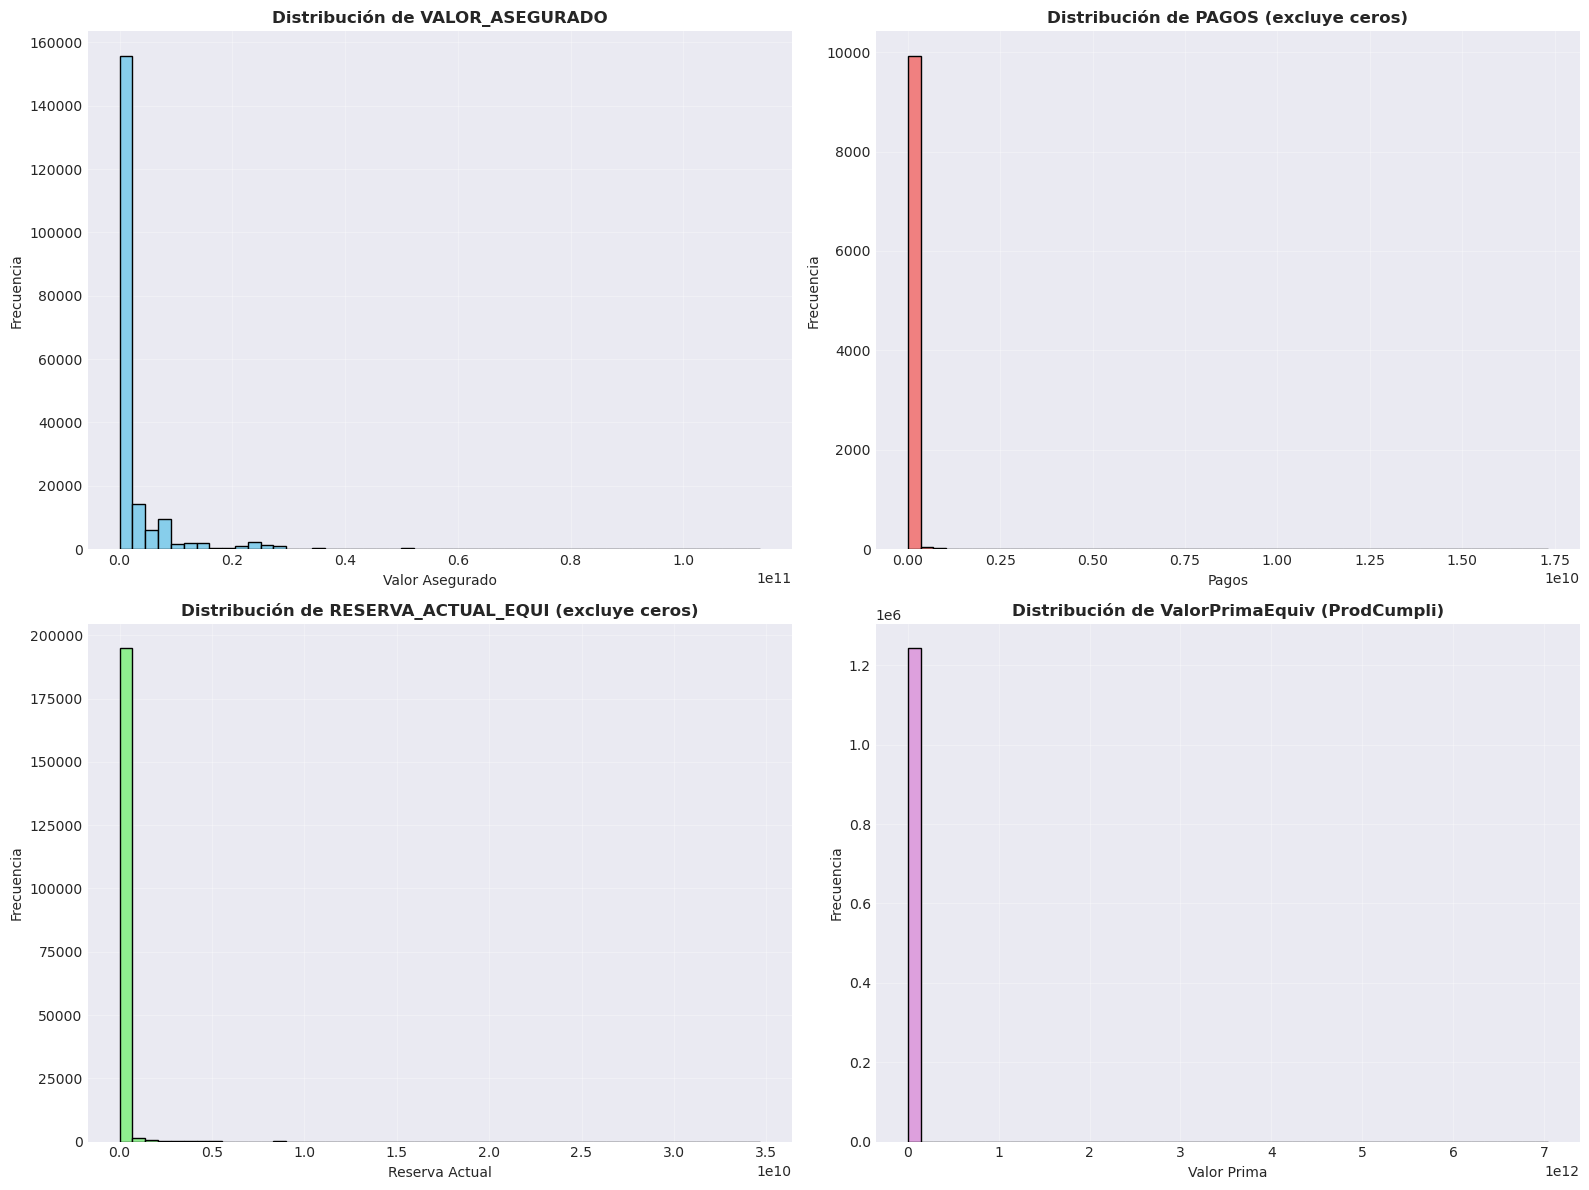

In [53]:
# Análisis de valores numéricos en SiniesCumpli
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# VALOR_ASEGURADO
df_sinies['VALOR_ASEGURADO'].plot(kind='hist', bins=50, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de VALOR_ASEGURADO', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Valor Asegurado')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].grid(alpha=0.3)

# PAGOS
df_sinies[df_sinies['PAGOS'] > 0]['PAGOS'].plot(kind='hist', bins=50, ax=axes[0, 1], color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribución de PAGOS (excluye ceros)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Pagos')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].grid(alpha=0.3)

# RESERVA_ACTUAL_EQUI
df_sinies[df_sinies['RESERVA_ACTUAL_EQUI'] > 0]['RESERVA_ACTUAL_EQUI'].plot(kind='hist', bins=50, ax=axes[1, 0], color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Distribución de RESERVA_ACTUAL_EQUI (excluye ceros)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Reserva Actual')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].grid(alpha=0.3)

# ValorPrimaEquiv (ProdCumpli)
df_prod['ValorPrimaEquiv'].plot(kind='hist', bins=50, ax=axes[1, 1], color='plum', edgecolor='black')
axes[1, 1].set_title('Distribución de ValorPrimaEquiv (ProdCumpli)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Valor Prima')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [54]:
# Guardar datasets procesados (opcional)
# df_prod.to_csv('../ProdCumpli_procesado.csv', index=False)
# df_sinies.to_csv('../SiniesCumpli_procesado.csv', index=False)
# print("✓ Datasets procesados guardados")